In [1]:
from algorithm_functions import *

In [2]:
np.random.seed(0)

In [3]:
def generate_cov_mat(d, k):
    W = np.random.normal(size =(d,k))
    S = W.dot(W.transpose()) + np.diag(np.random.uniform(size = (1, d)))
    S = np.diag(1. / np.sqrt(np.diagonal(S))).dot(S).dot(np.diag(1. / np.sqrt(np.diagonal(S))))
    return(S)

In [4]:
def plot_grid_for_dim(n_trips, errors, creat_func, n_sims, normalize, n_dim, means, covs, error_labels=None, cov_labels=None):
    plt.figure(figsize=(20,10))
    n_rows = len(errors)
    n_cols = len(means)
    if error_labels is None:
        error_labels = list(map(lambda x: 'Error = ' + str(x), errors))
    if cov_labels is None:
        cov_labels = ['No covariance', 'Low covariance', 'Moderate covariance']
    for i in range(n_rows):
        for j in range(n_cols):
            plt.subplot(n_rows, n_cols, i * n_cols + j + 1)
            simulate_fits(n_trips, errors[i], creat_func, n_sims, normalize, n_dim, means[j], covs[j], show=False)
            plt.title(error_labels[i] + ', ' + cov_labels[j])
            plt.xlabel('Iteration')
            plt.ylabel('Error')
    plt.subplots_adjust(hspace=0.3)

# Paper recreation

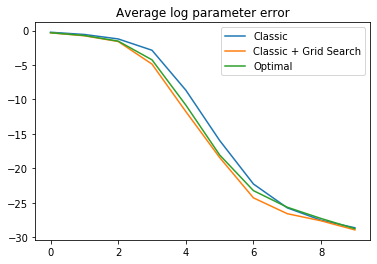

In [13]:
nd = 10
cov_mat = np.eye(nd)
simulate_fits(n_trips = 300, error_size = 0, creation_func = create_nd_data, n_sims = 200, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

# 3 dimensions

In [ ]:
nd = 3

covs = [np.eye(nd)]

mean_cov = np.inf
while mean_cov > 0.2:
    cov_mat = generate_cov_mat(3,3)
    #sum elements of upper triangle, subtract out diagonal (all ones, so nd total), divide by
    #number of elements in the upper triangle
    mean_cov = (np.sum(np.abs(np.triu(cov_mat))) - nd) / ((nd**2 - nd) / 2)
covs.append(cov_mat)

mean_cov = 0
while mean_cov < 0.55 or mean_cov > 0.7:
    cov_mat = generate_cov_mat(3,1)
    mean_cov = (np.sum(np.abs(np.triu(cov_mat))) - nd) / ((nd**2 - nd) / 2)
covs.append(cov_mat)

means = [np.zeros(nd) for _ in range(len(covs))]
errors = [0, 3]

plot_grid_for_dim(10000, errors, create_nd_data, 200, True, nd, means, covs)

# 9 dimensions

In [ ]:
nd = 9

covs = [np.eye(nd)]

mean_cov = np.inf
while mean_cov > 0.4:
    cov_mat = generate_cov_mat(9,9)
    mean_cov = (np.sum(np.abs(np.triu(cov_mat))) - nd) / ((nd**2 - nd) / 2)

covs.append(cov_mat)

mean_cov = 0
while mean_cov < 0.55 or mean_cov > 0.6:
    cov_mat = generate_cov_mat(9,4)
    mean_cov = (np.sum(np.abs(np.triu(cov_mat))) - nd) / ((nd**2 - nd) / 2)
covs.append(cov_mat)

means = [np.zeros(nd) for _ in range(len(covs))]
errors = [0, 3]

plot_grid_for_dim(10000, errors, create_nd_data, 200, True, nd, means, covs)

# 27 dimensions

In [ ]:
nd = 27

covs = [np.eye(nd)]

mean_cov = np.inf
while mean_cov > 0.4:
    cov_mat = generate_cov_mat(27,27)
    mean_cov = (np.sum(np.abs(np.triu(cov_mat))) - nd) / ((nd**2 - nd) / 2)
covs.append(cov_mat)

mean_cov = 0
while mean_cov < 0.5 or mean_cov > 0.7:
    cov_mat = generate_cov_mat(27,2)
    mean_cov = (np.sum(np.abs(np.triu(cov_mat))) - nd) / ((nd**2 - nd) / 2)
covs.append(cov_mat)

means = [np.zeros(nd) for _ in range(len(covs))]
errors = [0, 3]

plot_grid_for_dim(10000, errors, create_nd_data, 200, True, nd, means, covs)

# 3 dimensions

In [ ]:
nd = 3

## No covariance

### No error

In [ ]:
simulate_fits(n_trips = 10000, error_size = 0, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = np.eye(nd))

### Error = 3

In [ ]:
simulate_fits(n_trips = 10000, error_size = 3, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = np.eye(nd))

## Low Covariance

In [ ]:
mean_cov = np.inf
while mean_cov > 0.4:
    cov_mat = generate_cov_mat(3,3)
    mean_cov = np.mean(np.abs(cov_mat))

### No error

In [ ]:
simulate_fits(n_trips = 10000, error_size = 0, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

### Error = 3

In [ ]:
simulate_fits(n_trips = 10000, error_size = 3, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

## High Covariance

In [ ]:
mean_cov = 0
while mean_cov < 0.7:
    cov_mat = generate_cov_mat(3,1)
    mean_cov = np.mean(np.abs(cov_mat))

### No error

In [ ]:
simulate_fits(n_trips = 10000, error_size = 0, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

### Error = 3

In [ ]:
simulate_fits(n_trips = 10000, error_size = 3, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

# 9 Dimensions

In [ ]:
nd = 9

## No covariance

### No error

In [ ]:
simulate_fits(n_trips = 10000, error_size = 0, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = np.eye(nd))

### Error = 3

In [ ]:
simulate_fits(n_trips = 10000, error_size = 3, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = np.eye(nd))

## Low Covariance

In [ ]:
mean_cov = np.inf
while mean_cov > 0.4:
    cov_mat = generate_cov_mat(9,9)
    mean_cov = np.mean(np.abs(cov_mat))

### No error

In [ ]:
simulate_fits(n_trips = 10000, error_size = 0, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

### Error = 3

In [ ]:
simulate_fits(n_trips = 10000, error_size = 3, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

## High Covariance

In [ ]:
mean_cov = 0
while mean_cov < 0.7:
    cov_mat = generate_cov_mat(9,1)
    mean_cov = np.mean(np.abs(cov_mat))

### No error

In [ ]:
simulate_fits(n_trips = 10000, error_size = 0, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

### Error = 3

In [ ]:
simulate_fits(n_trips = 10000, error_size = 3, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

# 27 dimensions

In [ ]:
nd = 27

## No covariance

### No error

In [ ]:
simulate_fits(n_trips = 10000, error_size = 0, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = np.eye(nd))

### Error = 3

In [ ]:
simulate_fits(n_trips = 10000, error_size = 3, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = np.eye(nd))

## Low covariance

In [ ]:
mean_cov = np.inf
while mean_cov > 0.4:
    cov_mat = generate_cov_mat(27,27)
    mean_cov = np.mean(np.abs(cov_mat))

### No error

In [ ]:
simulate_fits(n_trips = 10000, error_size = 0, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

### Error = 3

In [ ]:
simulate_fits(n_trips = 10000, error_size = 3, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

## High covariance

In [ ]:
mean_cov = 0
while mean_cov < 0.7:
    cov_mat = generate_cov_mat(27,1)
    mean_cov = np.mean(np.abs(cov_mat))

### No error

In [ ]:
simulate_fits(n_trips = 10000, error_size = 0, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)

### Error = 3

In [ ]:
simulate_fits(n_trips = 10000, error_size = 3, creation_func = create_nd_data, n_sims = 100, 
              do_normalize = True,
              n_dim = nd, mean = np.zeros(nd), cov = cov_mat)